In [1]:
# All the imports
import acquire as a
import prepare as p
# tabular manipulation
import numpy as np
import pandas as pd
# ML stuff:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier, \
export_text, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

Questions:
1.) Does paperless billing affect churn
2.) does streaming tv affect churn
3.) does streaming movies affect churn
4.) does tech support affect churn

In [2]:
telco = a.get_telco_data()

this file exists, reading from csv


In [3]:
telco = p.prep_telco(telco)
telco.head().T

,0,1,2,3,4
customer_id,0002-ORFBO,0003-MKNFE,0004-TLHLJ,0011-IGKFF,0013-EXCHZ
gender,Female,Male,Male,Male,Female
senior_citizen,0,0,0,1,1
partner,Yes,No,No,Yes,Yes
dependents,Yes,No,No,No,No
tenure,9,9,4,13,3
phone_service,Yes,Yes,Yes,Yes,Yes
multiple_lines,No,Yes,No,No,No
online_security,No,No,No,No,No
online_backup,Yes,No,No,Yes,No


In [4]:
telco.monthly_charges.isna()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: monthly_charges, Length: 7043, dtype: bool

In [5]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customer_id            7043 non-null   object 
 1   gender                 7043 non-null   object 
 2   senior_citizen         7043 non-null   int64  
 3   partner                7043 non-null   object 
 4   dependents             7043 non-null   object 
 5   tenure                 7043 non-null   int64  
 6   phone_service          7043 non-null   object 
 7   multiple_lines         7043 non-null   object 
 8   online_security        7043 non-null   object 
 9   online_backup          7043 non-null   object 
 10  device_protection      7043 non-null   object 
 11  tech_support           7043 non-null   object 
 12  streaming_tv           7043 non-null   object 
 13  streaming_movies       7043 non-null   object 
 14  paperless_billing      7043 non-null   object 
 15  monthly_c

In [6]:
telco['internet_service_type'] = telco['internet_service_type'].fillna('None')

In [11]:
train, val, test = p.splitting_data(telco, 'churn')

In [10]:
telco_train, telco_val, telco_test = p.splitting_data(telco, 'churn')

In [11]:
train_encode, val_encode, test_encode = p.preprocess_telco(telco_train,telco_val,telco_test)

In [15]:
train_encode.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4225 entries, 8775-CEBBJ to 1078-TDCRN
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   senior_citizen                         4225 non-null   int64  
 1   tenure                                 4225 non-null   int64  
 2   monthly_charges                        4225 non-null   int64  
 3   total_charges                          4225 non-null   float64
 4   gender_Male                            4225 non-null   int64  
 5   partner_Yes                            4225 non-null   int64  
 6   dependents_Yes                         4225 non-null   int64  
 7   phone_service_Yes                      4225 non-null   int64  
 8   multiple_lines_No phone service        4225 non-null   int64  
 9   multiple_lines_Yes                     4225 non-null   int64  
 10  online_security_No internet service    4225 non-null   int64  

In [11]:
train_encode.senior_citizen.value_counts()

senior_citizen
0    3575
1     650
Name: count, dtype: int64

In [12]:
X_train, y_train = train_encode.drop(columns='churn_Yes'), \
train_encode.churn_Yes

In [13]:
X_val, y_val = val_encode.drop(columns='churn_Yes'), \
val_encode.churn_Yes

In [14]:
X_test, y_test = test_encode.drop(columns='churn_Yes'), \
test_encode.churn_Yes

In [20]:
telco.isnull().sum()

customer_id              0
gender                   0
senior_citizen           0
partner                  0
dependents               0
tenure                   0
phone_service            0
multiple_lines           0
online_security          0
online_backup            0
device_protection        0
tech_support             0
streaming_tv             0
streaming_movies         0
paperless_billing        0
monthly_charges          0
total_charges            0
churn                    0
contract_type            0
internet_service_type    0
payment_type             0
dtype: int64

In [6]:
# replaces values in the total charges column with a blank space to 0.0
telco.total_charges = telco.total_charges.str.replace(' ','0.0')

In [7]:
# changes total_charges to a float instead of an object
telco['total_charges'] = (telco.total_charges + '0').astype(float)

In [8]:
telco = telco.set_index(['customer_id'])

In [18]:
train_encode.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4225 entries, 8775-CEBBJ to 1078-TDCRN
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   senior_citizen                         4225 non-null   int64  
 1   tenure                                 4225 non-null   int64  
 2   monthly_charges                        4225 non-null   int64  
 3   total_charges                          4225 non-null   float64
 4   gender_Male                            4225 non-null   int64  
 5   partner_Yes                            4225 non-null   int64  
 6   dependents_Yes                         4225 non-null   int64  
 7   phone_service_Yes                      4225 non-null   int64  
 8   multiple_lines_No phone service        4225 non-null   int64  
 9   multiple_lines_Yes                     4225 non-null   int64  
 10  online_security_No internet service    4225 non-null   int64  

## EXPLORE

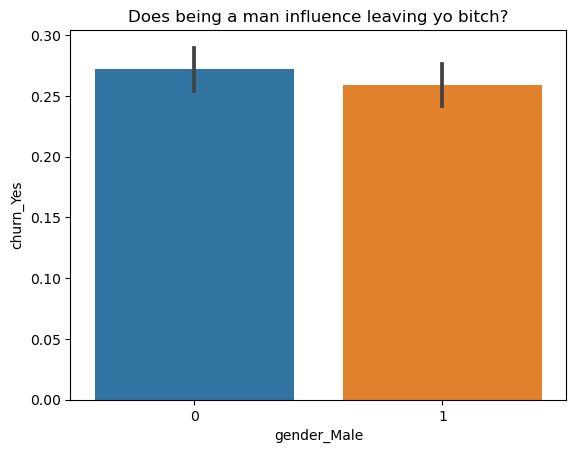

In [24]:
sns.barplot(data=train_encode, x='gender_Male', y='churn_Yes')
plt.title("Does being a man influence leaving yo bitch?")
plt.show()


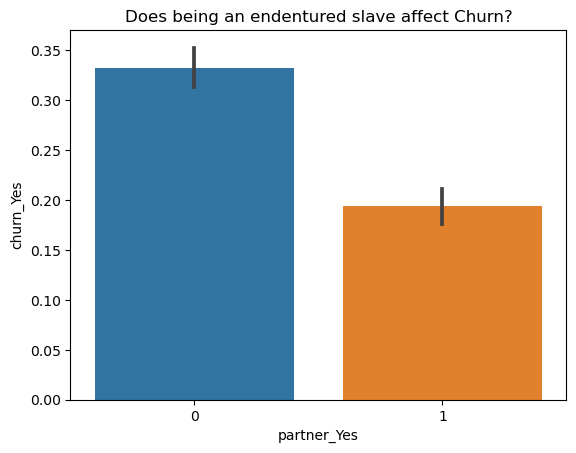

In [28]:
sns.barplot(data=train_encode, x='partner_Yes', y='churn_Yes')
plt.title("Does being an endentured slave affect Churn?")
plt.show()


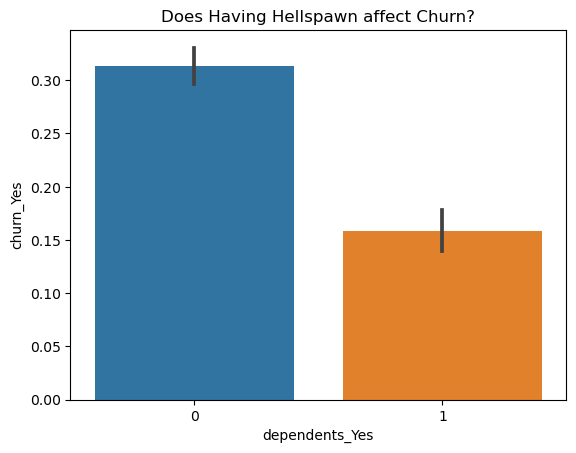

In [29]:
sns.barplot(data=train_encode, x='dependents_Yes', y='churn_Yes')
plt.title("Does Having Hellspawn affect Churn?")
plt.show()


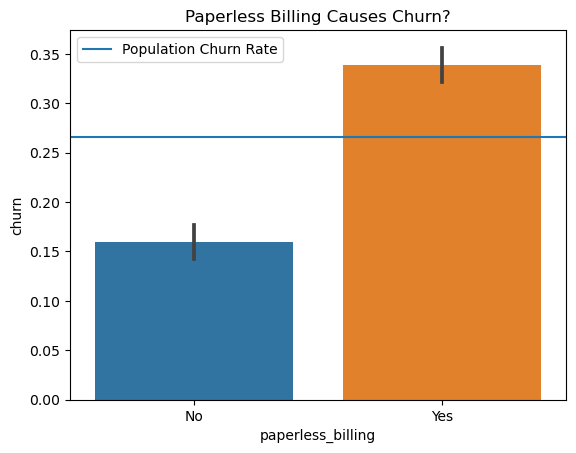

In [79]:
sns.barplot(data=telco_train, x='paperless_billing', y='churn')
plt.title("Paperless Billing Causes Churn?")
population_churn = telco_train.churn.mean()
plt.axhline(population_churn, label="Population Churn Rate")
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.legend()
plt.show()


In [32]:
# Let's run a chi squared to compare proportions, to have more confidence
α = 0.05
null_hypothesis = "There is NO relationship between paperless billing and churn"
alternative_hypothesis = "There is a relationship between paperless billing and churn"

# Setup a crosstab of observed survival to pclass
observed = pd.crosstab(telco_train.churn, telco_train.paperless_billing)

chi2, p, degf, expected = stats.chi2_contingency(observed)

if p < α:
    print(f"Reject the null hypothesis that, {null_hypothesis}")
    print(f"Sufficient evidence to move forward understanding that, {alternative_hypothesis}")
else:
    print("Fail to reject the null")
    print("Insufficient evidence to reject the null")
p

Reject the null hypothesis that, There is NO relationship between paperless billing and churn
Sufficient evidence to move forward understanding that, There is a relationship between paperless billing and churn


5.802667394637569e-38

In [11]:
# Let's run a chi squared to compare proportions, to have more confidence
α = 0.05
null_hypothesis = "There is NO relationship between paperless billing and churn"
alternative_hypothesis = "There is a relationship between paperless billing and churn"

# Setup a crosstab of observed survival to pclass
observed = pd.crosstab(telco_train.churn, telco_train.paperless_billing)

chi2, p, degf, expected = stats.chi2_contingency(observed)

if p < α:
    print(f"Reject the null hypothesis that, {null_hypothesis}")
    print(f"Sufficient evidence to move forward understanding that, {alternative_hypothesis}")
else:
    print("Fail to reject the null")
    print("Insufficient evidence to reject the null")
p

In [21]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4225 entries, 6201 to 731
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   senior_citizen                         4225 non-null   int64 
 1   tenure                                 4225 non-null   int64 
 2   monthly_charges                        4225 non-null   int64 
 3   total_charges                          4225 non-null   object
 4   gender_Male                            4225 non-null   int64 
 5   partner_Yes                            4225 non-null   int64 
 6   dependents_Yes                         4225 non-null   int64 
 7   phone_service_Yes                      4225 non-null   int64 
 8   multiple_lines_No phone service        4225 non-null   int64 
 9   multiple_lines_Yes                     4225 non-null   int64 
 10  online_security_No internet service    4225 non-null   int64 
 11  online_security_Yes 

In [15]:
y_train.value_counts()

churn_Yes
0    3104
1    1121
Name: count, dtype: int64

In [17]:
baseline = telco.churn.mode()
baseline

0    No
Name: churn, dtype: object

In [18]:
baseline_percentage_no = (telco.churn == "No").mean()
baseline_percentage_no

0.7346301292063041

In [19]:
baseline_percentage_yes = (telco.churn == "Yes").mean()
baseline_percentage_yes

0.2653698707936959

In [20]:
telco_tree = DecisionTreeClassifier()
telco_tree

DecisionTreeClassifier()

In [21]:
telco_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [22]:
X_train.head()

,senior_citizen,tenure,monthly_charges,total_charges,gender_Male,partner_Yes,dependents_Yes,phone_service_Yes,multiple_lines_No phone service,multiple_lines_Yes,...,streaming_movies_No internet service,streaming_movies_Yes,paperless_billing_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
6201,0,9,44,403.35,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
219,0,72,61,4390.25,1,0,0,0,1,0,...,0,1,1,0,1,0,0,1,0,0
952,0,7,20,164.85,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,1
198,0,26,88,2274.35,0,0,0,1,0,0,...,0,1,1,0,0,1,0,0,0,0
2544,0,31,89,2806.9,0,0,0,1,0,1,...,0,1,1,0,0,1,0,0,1,0


In [23]:
y_pred = telco_tree.predict(X_train)
y_pred[:10]

array([1, 0, 1, 1, 1, 0, 0, 0, 0, 0])

In [24]:
telco_tree.score(X_train, y_train)

0.9990532544378699

In [25]:
pd.crosstab(y_train, y_pred)

col_0,0,1
churn_Yes,,
0,3104,0
1,4,1117
